<a href="https://colab.research.google.com/github/Annabelle2915/Natural-Language-Processing-Projects/blob/main/SentimentAnalysis_Cyberbullying%20Tweets%20Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Line Wrapping in Collaboratory Google results

#from IPython.display import HTML, display

#def set_css():
 # display(HTML('''
 # <style>
   # pre {
   #     white-space: pre-wrap;
  #  }
 # </style>
 ## '''))
#get_ipython().events.register('pre_run_cell', set_css)

In [2]:
# Mount Googlde Drive
import io
import requests
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [3]:
# Import bone_marrow.csv dataset to path variable from google drive
path = "/content/gdrive/MyDrive/Colab Notebooks/cyberbullying_tweets.csv"

# Import pandas to read file i
import pandas as pd

# Assign dataset to dataframe named ori_df from variable path
df = pd.read_csv (path)


In [4]:
# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import LabelEncoder

In [5]:

df.head()

,tweet_text,cyberbullying_type
0,"In other words #katandandre, your food was cra...",not_cyberbullying
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47692 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47692 non-null  object
 1   cyberbullying_type  47692 non-null  object
dtypes: object(2)
memory usage: 745.3+ KB


In [7]:
# Check duplicated tweets
df.duplicated().sum()

36

In [8]:
# Remove the duplicated tweets
df = df[~df.duplicated()]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47656 entries, 0 to 47691
Data columns (total 2 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_text          47656 non-null  object
 1   cyberbullying_type  47656 non-null  object
dtypes: object(2)
memory usage: 1.1+ MB


In [10]:
# Check if the classes balanced or not
df.cyberbullying_type.value_counts()

religion               7997
age                    7992
ethnicity              7959
gender                 7948
not_cyberbullying      7937
other_cyberbullying    7823
Name: cyberbullying_type, dtype: int64

<Axes: xlabel='count', ylabel='cyberbullying_type'>

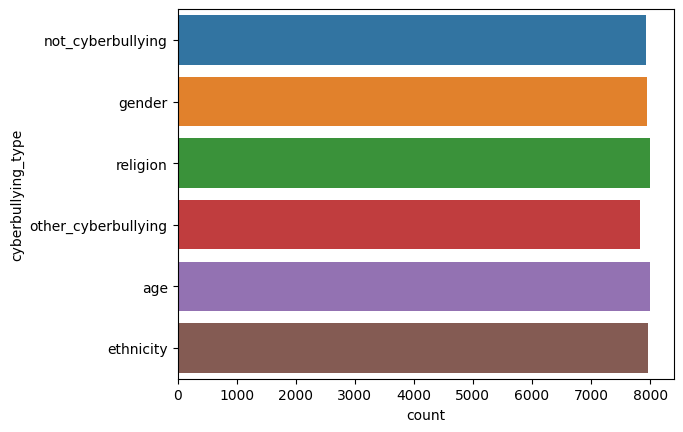

In [11]:
sns.countplot(data = df, y = 'cyberbullying_type')

In [12]:
df = df[df["cyberbullying_type"]!="other_cyberbullying"]

In [13]:
!pip install demoji

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.9/42.9 kB 4.4 MB/s eta 0:00:00


In [14]:
# Data preprocessing

In [15]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import demoji
import string

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [16]:
STOPWORDS = set(stopwords.words('english'))
STOPWORDS.update(['rt', 'mkr', 'didn', 'bc', 'n', 'm',
                  'im', 'll', 'y', 've', 'u', 'ur', 'don',
                  'p', 't', 's', 'aren', 'kp', 'o', 'kat',
                  'de', 're', 'amp', 'will', 'wa', 'e', 'like'])
stemmer = SnowballStemmer('english')
def clean_text(text):

    # Remove Hashtag, Mention, URLs
    pattern = re.compile(r"(#[A-Za-z0-9]+|@[A-Za-z0-9]+|https?://\S+|www\.\S+|\S+\.[a-z]+|RT @)")
    text = pattern.sub('', text)
    text = " ".join(text.split())

    # Lowercasing
    text = text.lower()

    # Stemming
    text = " ".join([stemmer.stem(word) for word in text.split()])

    # Removing Punctuations
    remove_punc = re.compile(r"[%s]" % re.escape(string.punctuation))
    text = remove_punc.sub('', text)

    # Removing stopwords
    text = " ".join([word for word in str(text).split() if word not in STOPWORDS])

    # Taking care of emojis
    emoji = demoji.findall(text)
    for emot in emoji:
        text = re.sub(r"(%s)" % (emot), "_".join(emoji[emot].split()), text)

    return text

In [17]:
# Cleaning the text
df['cleaned_text'] = df['tweet_text'].apply(lambda text: clean_text(text))

df.head()

,tweet_text,cyberbullying_type,cleaned_text
0,"In other words #katandandre, your food was cra...",not_cyberbullying,word food crapilicious
1,Why is #aussietv so white? #MKR #theblock #ImA...,not_cyberbullying,whi white
2,@XochitlSuckkks a classy whore? Or more red ve...,not_cyberbullying,classi whore red velvet cupcakes
3,"@Jason_Gio meh. :P thanks for the heads up, b...",not_cyberbullying,gio meh thank head concern anoth angri dude tw...
4,@RudhoeEnglish This is an ISIS account pretend...,not_cyberbullying,isi account pretend kurdish account islam lies


In [18]:
# Checking missing values
df.isnull().sum()

tweet_text            0
cyberbullying_type    0
cleaned_text          0
dtype: int64

In [19]:
# Checking duplicated values
df['cleaned_text'].duplicated().sum()

894

In [20]:
# Drop duplicated values
df.drop_duplicates("cleaned_text", inplace = True)

In [21]:
# Checking tweets with only white spaces
df['cleaned_text'].str.isspace().sum()

0

In [22]:
# Plotting the histogram of top 15 words of each cyberbullying type
for cyber_type in df.cyberbullying_type.unique():

    top50_word = df.cleaned_text[df.cyberbullying_type==cyber_type].str.split(expand=True).stack().value_counts()[:15]

    fig = px.bar(top50_word, color=top50_word.values, color_continuous_scale=px.colors.sequential.RdPu, custom_data=[top50_word.values])
    fig.update_traces(marker_color='blue')
    fig.update_traces(hovertemplate='<b>Count: </b>%{customdata[0]}')
    fig.update_layout(title=f"Top 15 words for {cyber_type}",
                     template='simple_white',
                     hovermode='x unified')
    fig.show()

In [23]:
# Label encoding
lenc = LabelEncoder()
df.cyberbullying_type = lenc.fit_transform(df.cyberbullying_type)

In [24]:
lenc.classes_

array(['age', 'ethnicity', 'gender', 'not_cyberbullying', 'religion'],
      dtype=object)

In [25]:
print (lenc.classes_)

['age' 'ethnicity' 'gender' 'not_cyberbullying' 'religion']


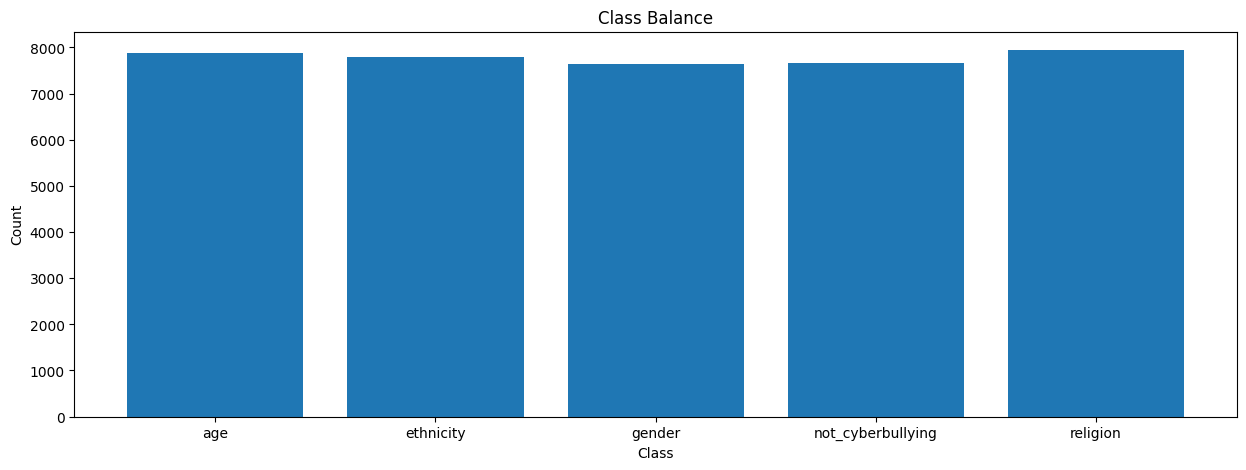

In [26]:
plt.figure(figsize=(15,5))
un, count = np.unique(df.cyberbullying_type.values, return_counts=True)
plt.bar([lenc.classes_[int(i)] for i in un] , count)
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Class Balance")
plt.show()

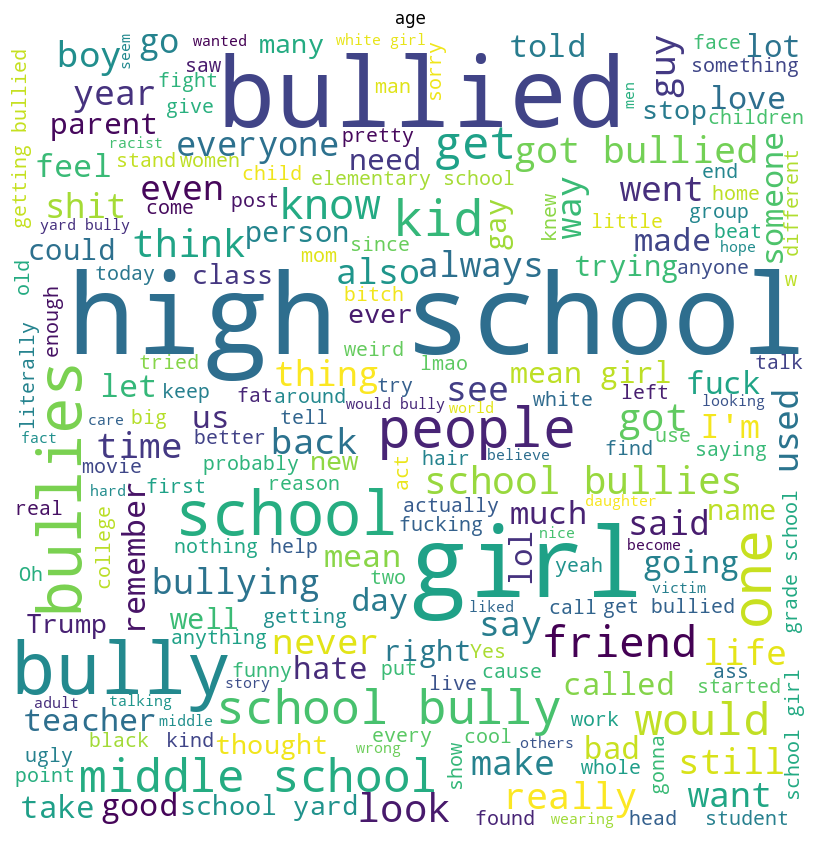

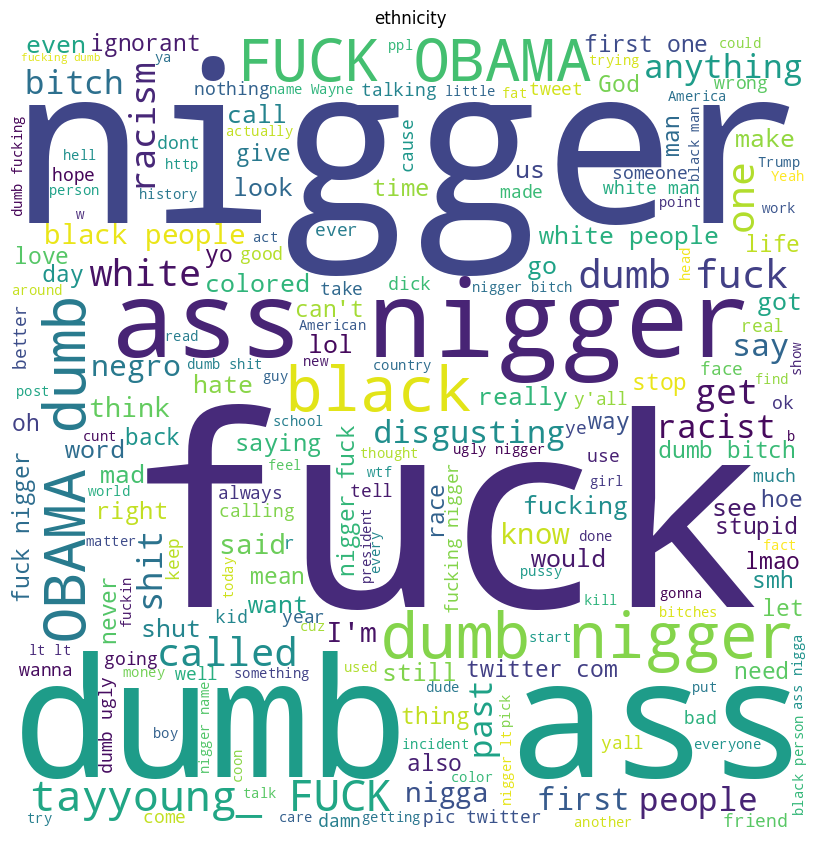

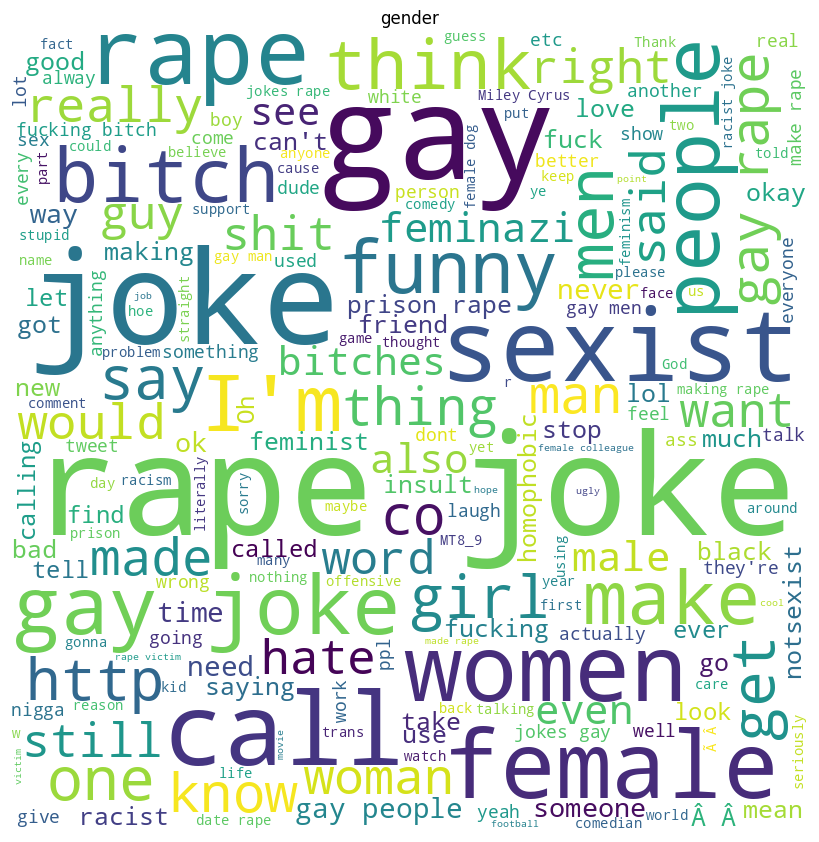

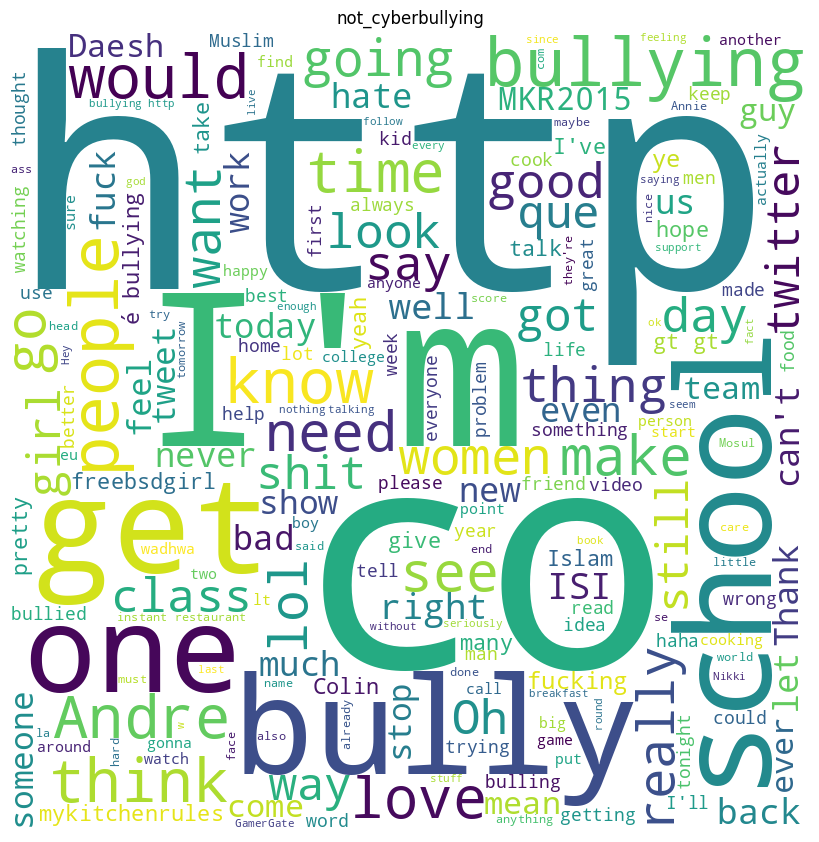

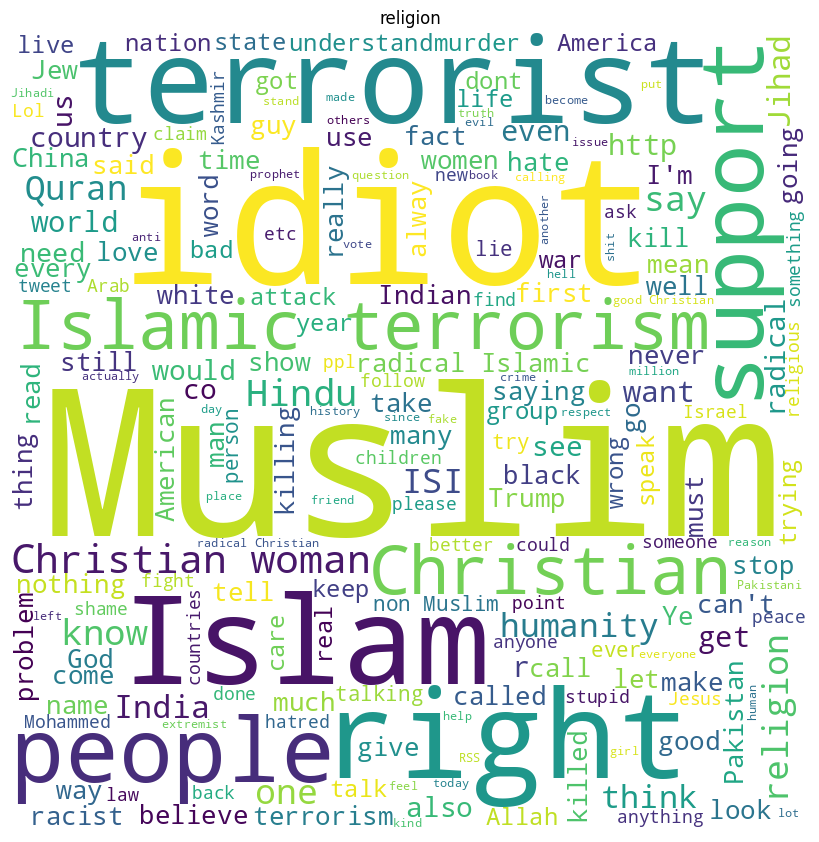

In [27]:
# WordCloud to check the most used words
for c in range(len(lenc.classes_)):
    string = ""
    for i in df[df.cyberbullying_type == c].tweet_text.values:
        string = string + " " + i.strip()

    wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = set(STOPWORDS),
                min_font_size = 10).generate(string)

    # plot the WordCloud image
    plt.figure(figsize = (8, 8), facecolor = None)
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.tight_layout(pad = 0)
    plt.title(lenc.classes_[c])
    plt.show()
    del string

AI Approach

Train test split

In [28]:
# Train test split
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
X = df['cleaned_text']
y = df['cyberbullying_type']

In [30]:
# Performing the train|test split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1, random_state = 42)

Feature Extraction

In [31]:
# Feature Extraction
# Using the TF - IDF Vectorizer to extract top 5000 most important features from the text data
tfidf = TfidfVectorizer(max_features = 5000)

In [32]:
# Creating the vocabulary only from the training set to avoid data leakage from the test set.
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [33]:
X_train_tfidf  # Sparse Matrix is created to save memory since many values are close to 0

<35045x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 403608 stored elements in Compressed Sparse Row format>

In [34]:
X_test_tfidf  # Sparse Matrix

<3894x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 43982 stored elements in Compressed Sparse Row format>

In [35]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
tfidf_array_train = X_train_tfidf.toarray()
tfidf_array_test = X_test_tfidf.toarray()
scaled_X_train = scaler.fit_transform(tfidf_array_train)
scaled_X_test = scaler.transform(tfidf_array_test)

In [36]:
# Performing Dimensionality Reduction using Principal Component Analysis
from sklearn.decomposition import PCA
# Total number of features
NUM_COMPONENTS = 5000
pca = PCA(NUM_COMPONENTS)
reduced = pca.fit(scaled_X_train)

In [37]:
# Calculating the cumulative explained variance by the components
variance_explained = np.cumsum(pca.explained_variance_ratio_)

Text(0, 0.5, 'Cumulative explained variance')

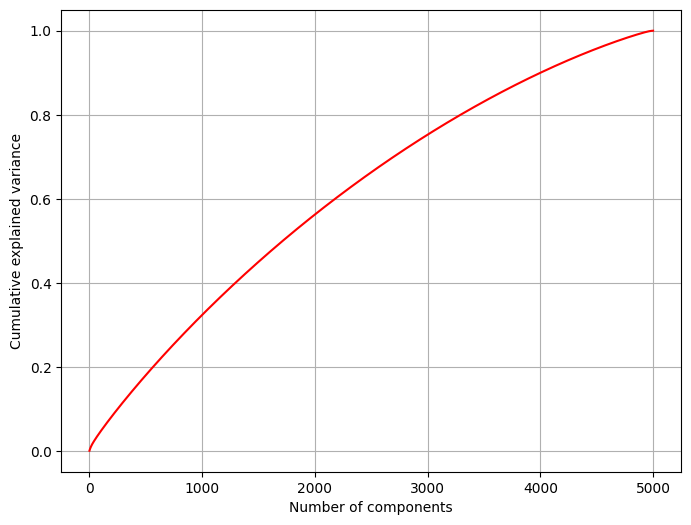

In [38]:
# Plotting
fig, ax = plt.subplots(figsize=(8, 6))
plt.plot(range(NUM_COMPONENTS),variance_explained, color='r')
ax.grid(True)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")

In [ ]:
final_pca = PCA(0.9)
# Number of Components explaining 90% variance in the training data
reduced_90 = final_pca.fit_transform(scaled_X_train)

In [ ]:
reduced_90_test = final_pca.transform(scaled_X_test)

In [ ]:
reduced_90.shape

In [ ]:
final_pca = PCA(0.8)
# Number of Components explaining 80% variance in the training data
reduced_80 = final_pca.fit_transform(scaled_X_train)

In [ ]:
reduced_80.shape

In [ ]:
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingGridSearchCV

In [ ]:
# SUPPORT VECTOR MACHINES
from sklearn.svm import LinearSVC
svm_model = LinearSVC()
C = [1e-5, 1e-4, 1e-2, 1e-1, 1]
param_grid = {'C': C}
grid_svm_model = HalvingGridSearchCV(svm_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_svm_model.fit(X_train_tfidf, y_train)
preds_grid_svm_model = grid_svm_model.predict(X_test_tfidf)

In [ ]:
# Predict and store cyberbullying type based on predictors (train and test dataset)
SVM_pred_train = grid_svm_model.predict(X_train_tfidf)
SVM_pred_test = grid_svm_model.predict(X_test_tfidf)

In [ ]:
print (SVM_pred_test)

In [ ]:
# Show the accuracy result of train and test dataset using svm model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, SVM_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, SVM_pred_test)))

In [ ]:
# Perfomance evaluation of the SVM model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, SVM_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted age', 'Predicted ethnicity', 'Predicted gender' , 'Predicted not_cyberbullying', 'Predicted Religion', 'Total',]
cm = cm.set_index([['Actual age', 'Actual ethnicity', 'Actual gender' , 'Actual not_cyberbullying', 'Actual Religion', 'Total',]])
print("Confusion matrix for SVM:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report:")
print(classification_report (y_test, SVM_pred_test))

In [ ]:
# NEURAL NETWORKS
from sklearn.neural_network import MLPClassifier
nn_model = MLPClassifier(activation = 'logistic', max_iter = 10)  # Sigmoid Activation Function
param_grid = {'learning_rate_init': [0.001, 0.0015, 0.002, 0.0025]}
grid_nn_model = HalvingGridSearchCV(nn_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_nn_model.fit(X_train_tfidf, y_train)
preds_grid_nn_model = grid_nn_model.predict(X_test_tfidf)

In [ ]:
# Predict and store cyberbullying type based on predictors (train and test dataset)
nn_pred_train = grid_nn_model.predict(X_train_tfidf)
nn_pred_test = grid_nn_model.predict(X_test_tfidf)

In [ ]:
print (nn_pred_test)

In [ ]:
# Show the accuracy result of train and test dataset using nn model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, nn_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, nn_pred_test)))

In [ ]:
# Perfomance evaluation of the SVM model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, nn_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted age', 'Predicted ethnicity', 'Predicted gender' , 'Predicted not_cyberbullying', 'Predicted Religion', 'Total',]
cm = cm.set_index([['Actual age', 'Actual ethnicity', 'Actual gender' , 'Actual not_cyberbullying', 'Actual Religion', 'Total',]])
print("Confusion matrix for SVM:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report for Neural Network:")
print(classification_report (y_test, nn_pred_test))

In [ ]:
# RANDOM FORESTS
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state = 42)
n_estimators = [64, 100, 128]
bootstrap = [True, False] # Bootstrapping is true by default
param_grid = {'n_estimators': n_estimators, 'bootstrap': bootstrap}
grid_rf_model = HalvingGridSearchCV(rf_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_rf_model.fit(X_train_tfidf, y_train)
preds_grid_rf_model = grid_rf_model.predict(X_test_tfidf)

In [ ]:
# Predict and store cyberbullying type based on predictors (train and test dataset)
rf_pred_train = grid_rf_model.predict(X_train_tfidf)
rf_pred_test = grid_rf_model.predict(X_test_tfidf)

In [ ]:
print (rf_pred_test)

In [ ]:
# Show the accuracy result of train and test dataset using rf model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, rf_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, rf_pred_test)))

In [ ]:
# Perfomance evaluation of the SVM model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, rf_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted age', 'Predicted ethnicity', 'Predicted gender' , 'Predicted not_cyberbullying', 'Predicted Religion', 'Total',]
cm = cm.set_index([['Actual age', 'Actual ethnicity', 'Actual gender' , 'Actual not_cyberbullying', 'Actual Religion', 'Total',]])
print("Confusion matrix for SVM:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report for Random Forest:")
print(classification_report (y_test, rf_pred_test))

In [ ]:
# GRADIENT BOOSTING
from sklearn.ensemble import GradientBoostingClassifier
grad_model = GradientBoostingClassifier(random_state = 42)
param_grid = {'n_estimators': [64, 100, 128, 200]}
grid_grad_model = HalvingGridSearchCV(grad_model, param_grid = param_grid, n_jobs = -1, min_resources = 'exhaust', factor = 3)
grid_grad_model.fit(X_train_tfidf, y_train)
preds_grid_grad_model = grid_grad_model.predict(X_test_tfidf)

In [ ]:
# Predict and store cyberbullying type based on predictors (train and test dataset)
grad_pred_train = grid_grad_model.predict(X_train_tfidf)
grad_pred_test = grid_grad_model.predict(X_test_tfidf)

In [ ]:
print (grad_pred_test)

In [ ]:
# Show the accuracy result of train and test dataset using gradient boost model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, grad_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, grad_pred_test)))

In [ ]:
# Perfomance evaluation of the gb model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, grad_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted age', 'Predicted ethnicity', 'Predicted gender' , 'Predicted not_cyberbullying', 'Predicted Religion', 'Total',]
cm = cm.set_index([['Actual age', 'Actual ethnicity', 'Actual gender' , 'Actual not_cyberbullying', 'Actual Religion', 'Total',]])
print("Confusion matrix for gb:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report for Gradient Boosting:")
print(classification_report (y_test, grad_pred_test))

In [ ]:
# NAIVE - BAYES
from sklearn.naive_bayes import MultinomialNB
nb_model = MultinomialNB()
nb_model.fit(X_train_tfidf, y_train)
preds_nb_model = nb_model.predict(X_test_tfidf)

In [ ]:
# Predict and store cyberbullying type based on predictors (train and test dataset)
nb_pred_train = nb_model.predict(X_train_tfidf)
nb_pred_test = nb_model.predict(X_test_tfidf)

In [ ]:
print (nb_pred_test)

In [ ]:
# Show the accuracy result of train and test dataset using naive bayes model
from sklearn.metrics import accuracy_score
print("Accuracy for train set: {0:0.4f}".format(accuracy_score(y_train, nb_pred_train)))
print("Accuracy for test set: {0:0.4f}".format(accuracy_score(y_test, nb_pred_test)))

In [ ]:
# Perfomance evaluation of the gb model
# via confusion matrix and classification report.

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = pd.DataFrame (confusion_matrix(y_test, nb_pred_test))
cm['Total'] = np.sum(cm,axis =1)
cm = cm.append (np.sum(cm, axis=0),ignore_index=True)
cm.columns = ['Predicted age', 'Predicted ethnicity', 'Predicted gender' , 'Predicted not_cyberbullying', 'Predicted Religion', 'Total',]
cm = cm.set_index([['Actual age', 'Actual ethnicity', 'Actual gender' , 'Actual not_cyberbullying', 'Actual Religion', 'Total',]])
print("Confusion matrix for nb:")
print (cm)

# Print classification report
from sklearn.metrics import classification_report
print("\nClassification report for Naive Bayes:")
print(classification_report (y_test, nb_pred_test))

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

# Compute false positive rates, true positive rates and thresholds
# based on the logistic regression, random forest and neural network
# models' prediction.
rf_test_fpr, rf_test_tpr, rf_test_thresholds = roc_curve(y_test, rf_pred_test)
grad_test_fpr, grad_test_tpr, grad_test_thresholds = roc_curve(y_test, grad_pred_test)
nn_test_fpr, nn_test_tpr, nn_test_thresholds = roc_curve(y_test, nn_pred_test)
nb_test_fpr, nb_test_tpr, nb_test_thresholds = roc_curve(y_test, nb_pred_test)
svm_test_fpr, svm_test_tpr, svm_test_thresholds = roc_curve(y_test, SVM_pred_test)

# Compute area under curve for all three prediction models.
rf_auc = auc(rf_test_fpr, rf_test_tpr)
grad_auc = auc(grad_test_fpr, grad_test_tpr)
nn_auc = auc(nn_test_fpr, nn_test_tpr)
nb_auc = auc(nb_test_fpr, nb_test_tpr)
svm_auc = auc(svm_test_fpr, svm_test_tpr)

In [ ]:
# Set figure size
sbn.set(rc={"figure.figsize": (7, 6)})

# Plot ROC curve for all three prediction models based on
# respective false positive rate and true positive rate.
plt.plot(rf_test_fpr, rf_test_tpr, label="Random Forest model (AUC): {0:0.4f}".format(rf_auc), marker=".")
plt.plot(grad_test_fpr, grad_test_tpr, label="Gradient Boosting model (AUC): {0:0.4f}".format(grad_auc), marker=".")
plt.plot(nn_test_fpr, nn_test_tpr, label="Neural Network model (AUC): {0:0.4f}".format(nn_auc), marker=".")
plt.plot(nb_test_fpr, nb_test_tpr, label="Naive Bayes model (AUC): {0:0.4f}".format(nb_auc), marker=".")
plt.plot(svm_test_fpr, svm_test_tpr, label="SVM model (AUC): {0:0.4f}".format(svm_auc), marker=".")

# Plot line with 0.5 AUC (Random prediction)
plt.plot([0, 1], [0, 1], color='grey', lw=1, linestyle='--')

# Labeling axis and graph title
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")

In [ ]:
# Creating a pipeline
from sklearn.pipeline import Pipeline
pipe = Pipeline([('tfidf', TfidfVectorizer(max_features = 5000)), ('rf_model', RandomForestClassifier(n_estimators = 128, random_state = 42))])
pipe.fit(X, y)

In [ ]:
pipe.predict(["@abc Hey man! Great match today. Your smashes were spot on. Let's continue playing together. \
               #badminton #brotherhood #men #doubles"])

**Results**

In [ ]:
from sklearn.metrics import plot_confusion_matrix, classification_report

In [ ]:
# Naive Bayes

# classification report
print(classification_report(y_test, preds_nb_model))

In [ ]:
# confusion matrix
plot_confusion_matrix(nb_model, X_test_tfidf, y_test)

In [ ]:
# Neural Networks

# classification report
print(classification_report(y_test, preds_grid_nn_model))

In [ ]:
# confusion matrix
plot_confusion_matrix(grid_nn_model, X_test_tfidf, y_test)

In [ ]:
# model object fitted with the best parameters
grid_nn_model.best_estimator_

In [ ]:
# Gradient Boosting

# classification report
print(classification_report(y_test, preds_grid_grad_model))

In [ ]:
# confusion matrix
plot_confusion_matrix(grid_grad_model, X_test_tfidf, y_test)

In [ ]:
# model object fitted with the best parameters
grid_grad_model.best_estimator_

In [ ]:
# Support Vector Machine

# classification report
print(classification_report(y_test, preds_grid_svm_model))

In [ ]:
# confusion matrix
plot_confusion_matrix(grid_svm_model, X_test_tfidf, y_test)

In [ ]:
# model object fitted with the best parameter
grid_svm_model.best_estimator_

In [ ]:
# Random Forest

# classification report
print(classification_report(y_test, preds_grid_rf_model))

In [ ]:
# confusion matrix
plot_confusion_matrix(grid_rf_model, X_test_tfidf, y_test)

In [ ]:
# model object fitted with the best parameter
grid_rf_model.best_estimator_